<a href="https://colab.research.google.com/github/somoon0422/deep_learning/blob/Fashion-MNIST-classification-with-Tensorflow/4_with_simpleDNN%2C_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

## 1. Fashion-MNIST 데이터셋 불러오기

In [ ]:
# Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_test.shape

(10000, 28, 28)

## 2. 데이터 시각화하기

In [ ]:
# class names
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
y_train[0]

9

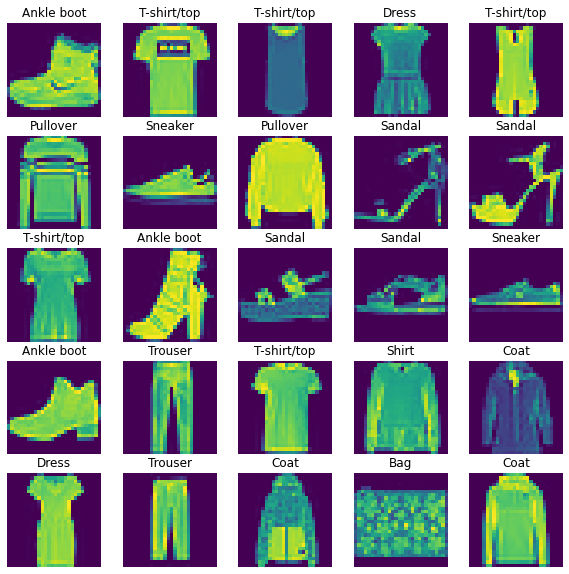

In [ ]:
# Create a figure and subplot grid
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
axs = axs.ravel()

# Loop through the first 25 images and plot them
for i in range(25):
    # Plot the image
    axs[i].imshow(x_train[i])
    axs[i].set_title(class_names[y_train[i]])
    axs[i].axis("off")

# Show the plot
plt.show()

## 3. 딥러닝 모델 정의

In [ ]:
x_train[0]

In [ ]:
# 0~1 사이의 값으로 normalize 합니다.
# 이는 옵티마이저가 조금 더 빠르고 정확하게 최적해를 찾는데 도움이 됩니다.
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [ ]:
x_train[0]

In [ ]:
# data 형태 바꾸기.. 28*28 형태의 데이터를.. 784 형태의 벡터로 바꿔줍니다.
print(x_train.shape, x_test.shape)
x_train = x_train.reshape(-1,784)
x_test = x_test.reshape(-1,784)
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 784) (10000, 784)


In [ ]:
len(x_train[0])

784

In [ ]:
# Sequential 모델 정의
model = keras.Sequential([
    keras.Input(shape=(784)), # mnist image는 28*28=784 형태
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax"),
])

In [ ]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
# 모델 컴파일
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy", # label이 one-hot 벡터가 아닌 일반 정수형일 때 내부적으로 one-hot vector로 바꿔서 계산해줌.
    metrics=["accuracy"],
)

In [ ]:
# 모델 학습
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=5,
)

Epoch 1/5
938/938 [==============================] - 9s 9ms/step - loss: 0.8933 - accuracy: 0.6768
Epoch 2/5
938/938 [==============================] - 8s 8ms/step - loss: 0.5610 - accuracy: 0.7971
Epoch 3/5
938/938 [==============================] - 7s 7ms/step - loss: 0.5006 - accuracy: 0.8206
Epoch 4/5
938/938 [==============================] - 7s 8ms/step - loss: 0.4617 - accuracy: 0.8348
Epoch 5/5
938/938 [==============================] - 7s 7ms/step - loss: 0.4369 - accuracy: 0.8436


## 4. 모델 평가

In [ ]:
# 모델 예측값 확인
predict = np.round(model.predict(x_test[0].reshape(-1, 784)), 3)
predict

1/1 [==============================] - 0s 62ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.181, 0.   , 0.212, 0.004,
        0.603]], dtype=float32)

In [ ]:
# 모델이 예측한 lable
predict_label = np.argmax(predict, axis=1)
class_names[predict_label[0]]

'Ankle boot'

'Ankle boot'

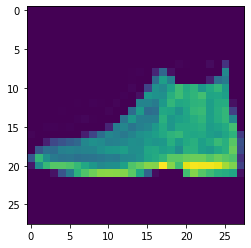

In [ ]:
# 실제 데이터의 lable과 img
plt.imshow(x_test[0].reshape(28,28))
class_names[y_test[0]]

In [ ]:
# test set으로 모델 평가
test_scores = model.evaluate(x_test.reshape(-1, 784), y_test)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.4656 - accuracy: 0.8324
Test loss: 0.4656423330307007
Test accuracy: 0.8324000239372253
